# Introduction

#### __All the information compiled in this notebook was provided by the professor "ROMERO BARRAGAN RAUL"__

## <font color='darkblue'>Basic Python Tools</font>

# Getting Started with Notebooks

This is a Jupyter notebook.

It serves as a space where you can write code and immediately see the results (whether it's code, plots, or other outputs) but also write text, insert images, formulas, etc.

 
 

### Equations

We can add equations in Jupyter using $\LaTeX$.

With the following code in the `Raw NBConvert` cell type, we would generate two equations:

$\LaTeX$
 

\begin{align}
    \begin{split}
        y &= mx + b \\
        x &= \frac{y - b}{m}
    \end{split}
\end{align}


### Text in Different Sizes

We can write "normal" text and also titles using the `#` symbol.


Normal text

# Title

## Title

### Another title

#### Another title

### Code

This notebook has a Python kernel. In short, that allows us to run Python in this notebook.

### Basic Data Types
* Strings (`str`).
* Numbers
    * Integers (`int`).
    * Floats (`float`).
* Sequences
    * Lists (represented by `[...]`).
    * Tuples (represented by `(...)`).
    * Ranges (represented by `range`). 
* Mapping
    * Dictionaries (represented by `{...}`)
* Booleans


#### List/dict comprehension

This is one of the _Pythonic_ ways of working because it allows us to mix loops and generate some of these objects simultaneously.


In [1]:
# Lista
lista = [1,2,3,4]
[x * 2 for x in lista]

[2, 4, 6, 8]

In [2]:
# Diccionario
{str(posicion): valor * 2 for posicion, valor in enumerate(lista)}

{'0': 2, '1': 4, '2': 6, '3': 8}

## Introducing Main Libraries: Pandas, Numpy, and Matplotlib

### Pandas 

_Pandas_ is a library that allows us to handle data in a tabular form. 

The objects provided by Pandas are instantiable with various functionalities, ranging from basic ones like _mean, sum, absolute values_, among others, to more complex functions such as various plots, data description, etc. 

The basic object in Pandas is a _pandas.DataFrame_. This is a tabular way of viewing information that consists of rows and columns, and these can be of multiple types.

More in the official documentation: [Pandas Documentation](https://pandas.pydata.org/docs/) 
Repository: [Pandas GitHub](https://github.com/pandas-dev/pandas)


In [3]:
# Import a library for generating dates
import datetime

# Import the pandas library
import pandas as pd

# Generate a dictionary with different data types.
raw_data = {'col_numeric': [1, 2, -3, 4, -5],
            'col_text': ['text1', 'text2', 'text3', 'text4', 'text5'],
            'col_booleans': [True, True, False, True, False],
            'col_dates': [datetime.date(2020, 7, 28), datetime.date(2020, 7, 29),
                           datetime.date(2020, 7, 30), datetime.date(2020, 7, 31),
                           datetime.date(2020, 7, 28)]}

# Print our dictionary

## print(raw_data)

# Generate a table with pandas from that dictionary
df = pd.DataFrame(raw_data)
df

,col_numeric,col_text,col_booleans,col_dates
0,1,text1,True,2020-07-28
1,2,text2,True,2020-07-29
2,-3,text3,False,2020-07-30
3,4,text4,True,2020-07-31
4,-5,text5,False,2020-07-28


In [4]:
# Check the dtypes
df.dtypes

col_numeric      int64
col_text        object
col_booleans      bool
col_dates       object
dtype: object

In [5]:
# data frame type
type(df)

pandas.core.frame.DataFrame

#### Basic Operations with Pandas
`Pandas` allows us to perform calculations very easily, applicable to all values by column or by row even.

Suppose we want to access different columns; we can do it in two different ways:

* With the column name in quotes.
* With the column name preceded and followed by dots.

In [6]:
df = pd.DataFrame({"value": [3, 1, 2, None, 4, 5, 7, 9],
                   'user': ['a', 'a', 'b', 'b', 'c', 'a', 'b', 'c'],
                  'date': [datetime.date(2020, 7, 28), datetime.date(2020, 7, 29),
                           datetime.date(2020, 7, 30), datetime.date(2020, 7, 31),
                          datetime.date(2020, 7, 28),
                          datetime.date(2020, 8, 28),
                          datetime.date(2020, 9, 28),
                          datetime.date(2020, 10, 28)]})

In [7]:
df

,value,user,date
0,3.0,a,2020-07-28
1,1.0,a,2020-07-29
2,2.0,b,2020-07-30
3,NaN,b,2020-07-31
4,4.0,c,2020-07-28
5,5.0,a,2020-08-28
6,7.0,b,2020-09-28
7,9.0,c,2020-10-28


Mean

In [8]:
df['value'].mean()

4.428571428571429

In [9]:
df.value.mean()

4.428571428571429

Median

In [10]:
df.value.median()

4.0

Count 

In [11]:
df.value.count()

7

Median of the absolutes

In [12]:
df.value.abs().median()

4.0

We can also access specific coordinates. There are two main methods: `loc` and `iloc`.

* `loc`
    * Allows us to access via indices, i.e., with the "indicator" of each row.
    * Allows us to access by the direct name of columns.
* `iloc`
    * Allows us to access by positions regardless of the name of the index or column.

In [13]:
# Acces the matrix using loc
df.loc[0, 'user']

'a'

In [14]:
# Acces using iloc
df.iloc[0, 1]

'a'

So far, we have used some of the most basic components of Pandas. Next, we will explore other tools commonly used in data science:

* `Groupby` + `Aggregate`.
* `Mask`.
* `Shift`.
* `Expanding`.
* `Apply`.

#### `Groupby` + `Aggregate`

Como su nombre lo dice, `groupby` nos ayudará a agrupar. Podremos a partir de cierta agrupación calcular cosas de manera masiva y sin tener que hacer loops o algo por el estilo. 

In [15]:
# groupby user
grouped = df.groupby('user')
grouped

We create an object on which we can perform calculations with (1) `aggregate` or without it.

The format with `aggregate` will be like this: `{column(s): function(s)}`. If multiple columns or functions are provided, we can use `dict comprehension` for efficient filling.

In [16]:
# with aggregate
grouped.agg({'value': ['mean', 'median'], 
             'date': 'count'})

value         date
      mean median count
user                   
a      3.0    3.0     3
b      4.5    4.5     3
c      6.5    6.5     2

We can choose not to use `aggregate`, but this will imply using a single function, and the readability may be a bit challenging.

In [17]:
# without aggregate
grouped['value'].mean()

user
a    3.0
b    4.5
c    6.5
Name: value, dtype: float64

#### `Mask`

This command helps us replace values **given a condition.**

In [18]:
# Create a copy before
copy = df.copy()
copy

,value,user,date
0,3.0,a,2020-07-28
1,1.0,a,2020-07-29
2,2.0,b,2020-07-30
3,NaN,b,2020-07-31
4,4.0,c,2020-07-28
5,5.0,a,2020-08-28
6,7.0,b,2020-09-28
7,9.0,c,2020-10-28


In [19]:
# Command without replacement
copy.mask(cond=copy.value > 5)

,value,user,date
0,3.0,a,2020-07-28
1,1.0,a,2020-07-29
2,2.0,b,2020-07-30
3,NaN,b,2020-07-31
4,4.0,c,2020-07-28
5,5.0,a,2020-08-28
6,NaN,NaN,NaN
7,NaN,NaN,NaN


In [20]:
# Command with replacement
copy.mask(cond=copy.value > 5, other='yeti')

,value,user,date
0,3.0,a,2020-07-28
1,1.0,a,2020-07-29
2,2.0,b,2020-07-30
3,NaN,b,2020-07-31
4,4.0,c,2020-07-28
5,5.0,a,2020-08-28
6,yeti,yeti,yeti
7,yeti,yeti,yeti


#### `Shift`

This command helps us shift elements in a `DataFrame`. It is useful for variable generation and to avoid a phenomenon known as `leakage` (we will address it in detail later).

In [21]:
df['value'].shift()

0    NaN
1    3.0
2    1.0
3    2.0
4    NaN
5    4.0
6    5.0
7    7.0
Name: value, dtype: float64

#### `Expanding`

As the name suggests, this command expands over a minimum of `n` periods before generating a calculation.

If subsequent calculations are applied...

In [22]:
df['value'].expanding(min_periods=1)

Expanding [min_periods=1,center=False,axis=0,method=single]

In [23]:
df['value'].expanding(min_periods=1).mean()

0    3.000000
1    2.000000
2    2.000000
3    2.000000
4    2.500000
5    3.000000
6    3.666667
7    4.428571
Name: value, dtype: float64

In [24]:
df['value'].expanding(min_periods=2).mean()

0         NaN
1    2.000000
2    2.000000
3    2.000000
4    2.500000
5    3.000000
6    3.666667
7    4.428571
Name: value, dtype: float64

This command will not perform the calculation with only the `min_periods` parameter but with _at least `min_periods`_. 

#### `Apply`

This command allows us to apply functions to a series of rows and/or columns without the need for loops.

As an _input_, we can use predefined functions or `lambda` functions.

`Lambda` functions are local functions that can only be used on the line of code where they exist; they are used temporarily.

In [25]:
df['value']

0    3.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    7.0
7    9.0
Name: value, dtype: float64

In [26]:
# using lambda
df['value'].apply(lambda x: x ** 2)

0     9.0
1     1.0
2     4.0
3     NaN
4    16.0
5    25.0
6    49.0
7    81.0
Name: value, dtype: float64

In [27]:
# in a function
def cuadrado(x):
    return x**2

# Apply
df['value'].apply(cuadrado)

0     9.0
1     1.0
2     4.0
3     NaN
4    16.0
5    25.0
6    49.0
7    81.0
Name: value, dtype: float64

### Plots with Pandas

`Pandas` also allows us to generate plots very easily.

Let's plot the `value` column next.

<Axes: title={'center': 'value'}>

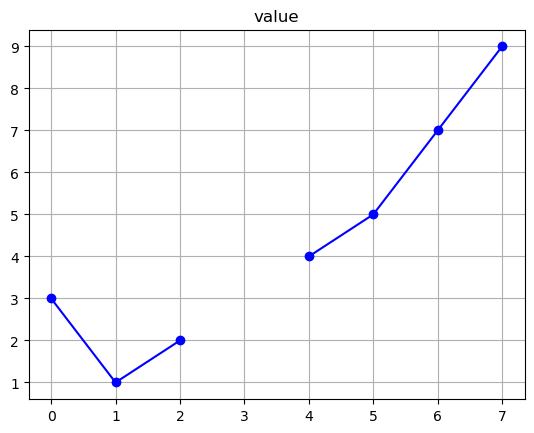

In [28]:
df.value.plot(
    kind = 'line',
    marker = 'o',
    color = 'blue',
    title = 'value',
    grid=True
)

### Numpy 

Numpy is a library that allows us to create arrays of different types (vectors, matrices), and it also has various implementations for generating random numbers or performing basic operations (averages, correlations, etc.).

Numpy uses the _array_ as its basic structure, which, according to its documentation, is faster to access and uses fewer resources than the classic Python list.

Reference: [Numpy Documentation](https://numpy.org/doc/stable/) Repository: [Numpy GitHub](https://github.com/numpy/numpy)

In [29]:
# Import the library
import numpy as np

# Generate an array
array = np.array([1, 2, 3, 4, 5])
array

array([1, 2, 3, 4, 5])

In [30]:
# mean
np.mean(array)

3.0

In [31]:
# median:
np.median(array)

3.0

We can think of a matrix as a series of arrays (`array`). There are different ways to generate them, but for now, we'll stick with this one.


In [32]:
# matrix
matrix = np.array([[1,2,3],[4,5,6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

Just like in Pandas, we can access the matrix row by row and column by column.

In [33]:
# Acces the matrix
matrix[0,1]

2

Numpy is a library that has many tools, one of them being the generation of random numbers.

This involves knowledge of probability and statistics. For now, we will only use the implementation without going into the details or the distribution shape.

In [34]:
# Generating a distribution of 100 random numbers ~N(0, 1)
# Setting a seed
np.random.seed(9)

# Generating the numbers
random_numbers = np.random.normal(size=100)
random_numbers

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00,
        6.75271167e-01,  3.19581170e-02,  9.18145896e-01,  3.80509466e-01,
        5.16367487e-01, -3.55239458e-01,  2.08777001e-01,  3.28411076e-01,
       -4.98224766e-01, -2.09177677e+00, -8.25877406e-02,  2.45518265e+00,
       -2.67211000e+00, -9.13279281e-01, -2.27314357e-01,  2.69315377e-01,
        1.13046126e+00,  1.04239745e+00,  1.30381044e+00,  1.38940073e+00,
       -6.56452578e-01, -5.62572959e-02, -4.99902620e-01,  4.36419381e-01,
       -3.75813047e-01, -9.23061583e-01,  1.91725024e+00, -1.50302842e-01,
       -6.38729756e-01,  8.24770331e-01, -1.21083874e+00, -5.03405377e-01,
       -7.01915693e-01, -

In [35]:
np.mean(random_numbers)

-0.012854169546612275

In [36]:
np.std(random_numbers)

1.0452320988940695

Let's do a quick time benchmark for the average over a list of 100,000 elements.

In [37]:
n = 100000
random_numbers = np.random.normal(size=n)
random_numbers_list = list(np.random.normal(size=n))

# Import library for measuring time
import time


tic = time.time()
np.mean(random_numbers_list)
toc = time.time()

measurement = toc - tic

print(f'The time for the list of {n} elements is: {measurement}')

tic = time.time()
np.mean(random_numbers)
toc = time.time()

measurement = toc - tic

print(f'The time for the array of {n} elements is: {measurement}')

The time for the list of 100000 elements is: 0.00850367546081543
The time for the array of 100000 elements is: 0.0


### Matplotlib

Matplotlib is a library that allows us, as its name suggests, to plot various types of figures, from time series to histograms, boxplots, etc.

To generate the plots, there are two "common" ways to do it, using `ax` or using `plt` directly.

More information: [Matplotlib Documentation](https://matplotlib.org/) Repo: [Matplotlib GitHub](https://github.com/matplotlib/matplotlib)


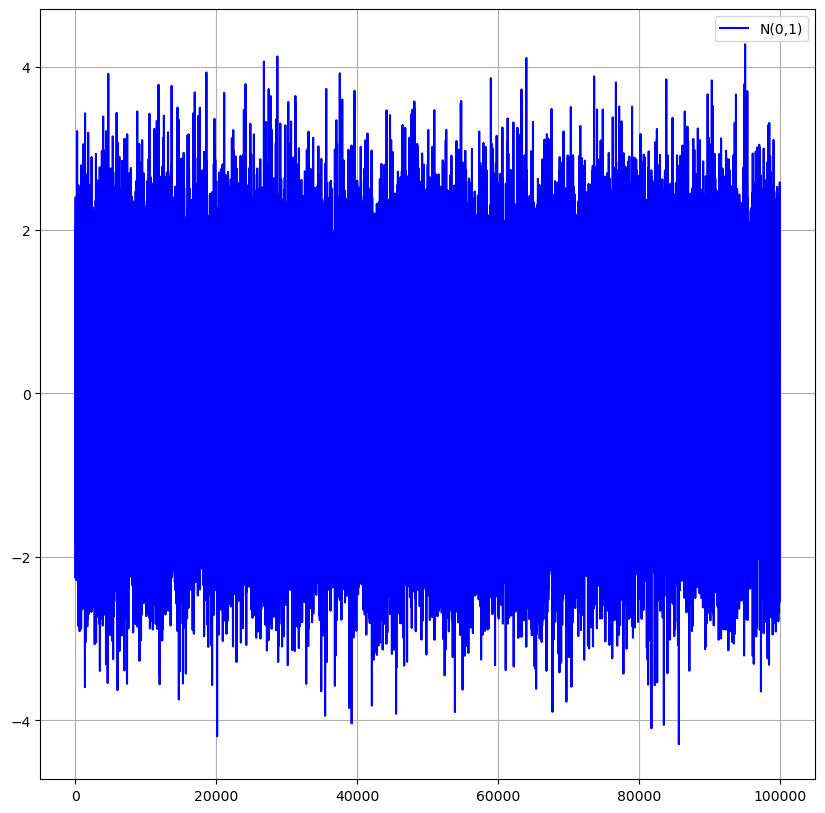

In [38]:
# Import the library
import matplotlib.pyplot as plt

# Defining the figures.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Generating the line
ax.plot(random_numbers, color='blue', label='N(0,1)')

# Generating a grid
ax.grid()

# Adding legend
ax.legend()

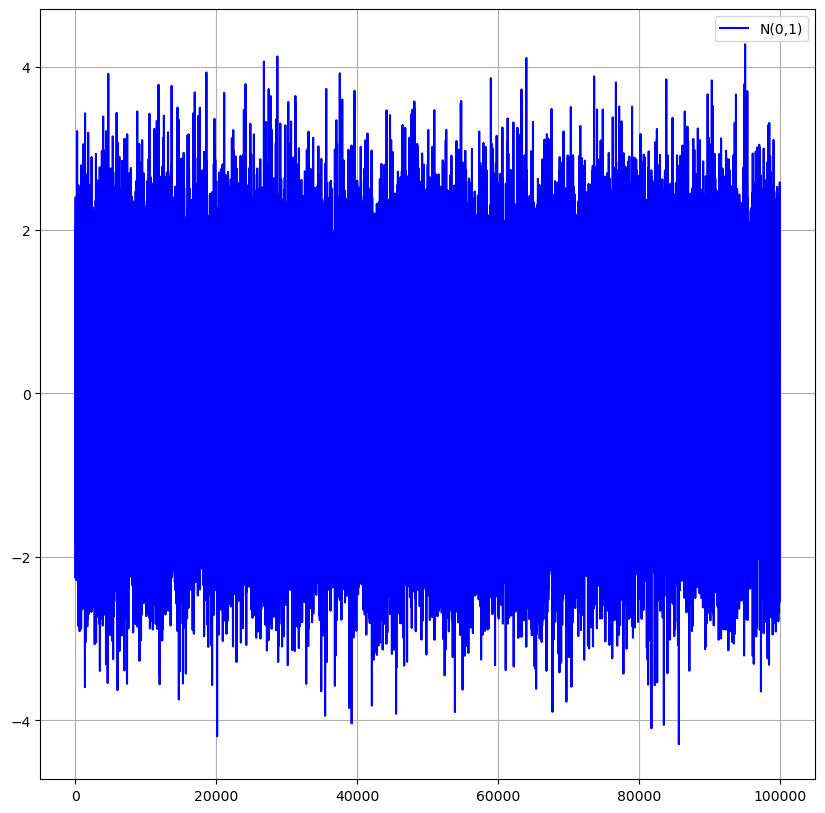

In [39]:
# Using plt

# Define figure
plt.figure(figsize=(10, 10))

# Generate the line
plt.plot(random_numbers, color='blue', label='N(0,1)')

# Add legend
plt.legend()

# Add grid
plt.grid()